In [4]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)


In [5]:
HW05_DIR = Path(".").resolve()
DATA_PATH = HW05_DIR / "S05-hw-dataset.csv"

# Папка для графиков
FIGURES_DIR = HW05_DIR / "figures"
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print("HW05_DIR:", HW05_DIR)
print("DATA_PATH exists:", DATA_PATH.exists())

df = pd.read_csv(DATA_PATH)
df.head()

HW05_DIR: /Users/vladimirfilimonov/PycharmProjects/Artificial_Intelligence_Engineering_2025-26/homeworks/HW05
DATA_PATH exists: True


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [6]:
TARGET_COL = "default"

# ЯВНО исключаем client_id из признаков (технический ID, в модель не включаем)
feature_cols = [c for c in df.columns if c not in [TARGET_COL, "client_id"]]

X = df[feature_cols].copy()
y = df[TARGET_COL].astype(int).copy()

print("X shape:", X.shape)
print("y shape:", y.shape)
print("client_id in X?", "client_id" in X.columns)
print("default in X?", TARGET_COL in X.columns)

assert "client_id" in df.columns, "В датасете должен присутствовать client_id"
assert "client_id" not in X.columns, "client_id должен быть исключён из X"

display(X.head())
display(y.head())


X shape: (3000, 15)
y shape: (3000,)
client_id in X? False
default in X? False


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


0    0
1    0
2    0
3    1
4    1
Name: default, dtype: int64

In [7]:
print("Shape:", df.shape)
display(df.head(10))

print("\nINFO:")
df.info()

print("\nDESCRIBE (numeric):")
display(df.describe())

print("\nTarget distribution (counts):")
display(df["default"].value_counts())

print("\nTarget distribution (normalized):")
display(df["default"].value_counts(normalize=True).rename("share"))


Shape: (3000, 17)


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score          

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Target distribution (counts):


default
0    1769
1    1231
Name: count, dtype: int64


Target distribution (normalized):


default
0    0.589667
1    0.410333
Name: share, dtype: float64

Размер датасета: 3000, 17

In [8]:
TARGET_COL = "default"
DROP_COLS = ["client_id"]  # технический id, не используем

# y
y = df[TARGET_COL].astype(int)

# X
X = df.drop(columns=[TARGET_COL] + [c for c in DROP_COLS if c in df.columns])

# проверим типы
non_numeric = X.columns[~X.dtypes.apply(lambda t: np.issubdtype(t, np.number))]
print("Non-numeric columns:", list(non_numeric))

X.head()


Non-numeric columns: []


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Train target share:\n", y_train.value_counts(normalize=True))
print("Test target share:\n", y_test.value_counts(normalize=True))

Train: (2400, 15) Test: (600, 15)
Train target share:
 default
0    0.589583
1    0.410417
Name: proportion, dtype: float64
Test target share:
 default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [10]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
# для ROC-AUC нужны вероятности класса 1
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

dummy_acc = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_proba_dummy)

print("DummyClassifier (most_frequent)")
print("Accuracy:", round(dummy_acc, 4))
print("ROC-AUC:", round(dummy_roc_auc, 4))


DummyClassifier (most_frequent)
Accuracy: 0.59
ROC-AUC: 0.5


Dummy — это точка отсчёта (наивная стратегия), чтобы понимать, «не делаем ли мы хуже случайного/тривиального решения».

In [11]:
C_grid = [0.01, 0.1, 1.0, 10.0, 100.0]

results = []
best = {"C": None, "roc_auc": -np.inf, "acc": None, "model": None}

for C in C_grid:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=2000, solver="lbfgs"))
    ])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results.append({"C": C, "accuracy": acc, "roc_auc": roc_auc})

    if roc_auc > best["roc_auc"]:
        best.update({"C": C, "roc_auc": roc_auc, "acc": acc, "model": pipe})

results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
results_df


,C,accuracy,roc_auc
4,100.00,0.801667,0.875649
3,10.00,0.800000,0.875637
2,1.00,0.800000,0.875614
1,0.10,0.801667,0.875477
0,0.01,0.806667,0.875442


In [12]:
best_model = best["model"]
print("Best C:", best["C"])
print("Best Accuracy:", round(best["acc"], 4))
print("Best ROC-AUC:", round(best["roc_auc"], 4))

y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion matrix:\n", cm)

print("\nClassification report:\n")
print(classification_report(y_test, y_pred_best, digits=4))


Best C: 100.0
Best Accuracy: 0.8017
Best ROC-AUC: 0.8756

Confusion matrix:
 [[310  44]
 [ 75 171]]

Classification report:

              precision    recall  f1-score   support

           0     0.8052    0.8757    0.8390       354
           1     0.7953    0.6951    0.7419       246

    accuracy                         0.8017       600
   macro avg     0.8003    0.7854    0.7904       600
weighted avg     0.8012    0.8017    0.7992       600



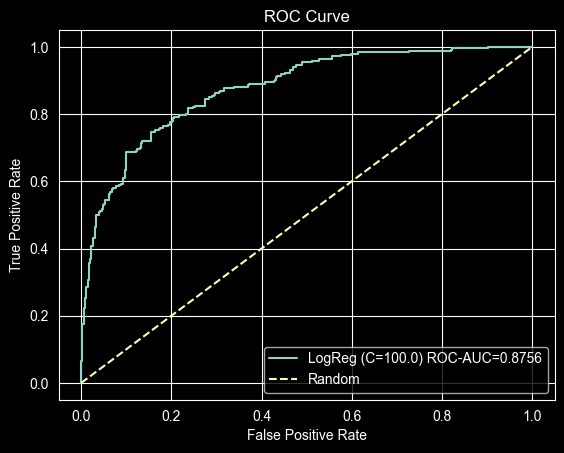

Saved: /Users/vladimirfilimonov/PycharmProjects/Artificial_Intelligence_Engineering_2025-26/homeworks/HW05/figures/roc_curve.png


In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)

plt.figure()
plt.plot(fpr, tpr, label=f"LogReg (C={best['C']}) ROC-AUC={best['roc_auc']:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

out_path = FIGURES_DIR / "roc_curve.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()

print("Saved:", out_path)


In [10]:
summary = pd.DataFrame([
    {"model": "DummyClassifier(most_frequent)", "accuracy": dummy_acc, "roc_auc": dummy_roc_auc},
    {"model": f"LogReg + Scaler (best C={best['C']})", "accuracy": best["acc"], "roc_auc": best["roc_auc"]},
])

summary


,model,accuracy,roc_auc
0,DummyClassifier(most_frequent),0.590000,0.500000
1,LogReg + Scaler (best C=100.0),0.801667,0.875649


## Итоговый текстовый отчёт (HW05)

1) Датасет содержит **3000** объектов и **15** признаков, при этом столбец **client_id** явно исключён из признаков, а таргет — **default**.
2) Доля класса **default=1** составляет примерно **0.410**, то есть задача умеренно несбалансирована.
3) Бейзлайн **DummyClassifier(strategy="most_frequent")** показал на тесте **accuracy=0.5900** и **ROC-AUC=0.5000** (ROC-AUC около 0.5 означает отсутствие ранжирования лучше случайного).
4) Модель **LogisticRegression** в пайплайне (**StandardScaler + LogisticRegression**) после перебора параметра регуляризации **C** дала на тесте **accuracy=0.8017** и **ROC-AUC=0.8756**.
5) По сравнению с бейзлайном логистическая регрессия улучшила качество: прирост **accuracy = +0.2117**, прирост **ROC-AUC = +0.3756**.
6) Лучшее качество по ROC-AUC среди протестированных значений получено при **C=100.0**, что говорит о том, что для данных требуется относительно слабая регуляризация.
7) Значение **ROC-AUC≈0.876** показывает, что модель хорошо различает классы и корректно ранжирует клиентов по риску дефолта.
8) Вывод: логистическая регрессия является разумной базовой моделью для этой задачи, так как заметно превосходит DummyClassifier по **accuracy** и особенно по **ROC-AUC**.
